## 数据时间序列

    对于金融时间序列，通过以日期和时间为索引。比如：一段周期内的股票价格。本章基于DataFrame和Series对于对于时间序列数据的处理进行分析。

    通过NumPy产生符合正态分布的4列数据，一共9组：

In [1]:
import numpy as np
import pandas as pd
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-1.376738,  1.275606,  1.151987,  0.794059],
       [-1.028658, -1.948032, -0.020286, -0.308158],
       [-1.134787,  0.644586, -1.446376,  0.347286],
       [ 0.428776,  0.382454, -1.302983,  0.554891],
       [ 0.200771, -0.049584,  1.114784, -0.961057],
       [-0.679689,  1.39213 , -0.518316, -0.501279],
       [-0.384334,  0.147521, -2.318875, -1.745496],
       [-0.025519,  0.18393 ,  0.512218,  0.379611],
       [-0.845315,  0.858769,  0.123257, -0.816389]])

    通过上述的NumPy数组构建DataFrame:

In [2]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.376738,1.275606,1.151987,0.794059
1,-1.028658,-1.948032,-0.020286,-0.308158
2,-1.134787,0.644586,-1.446376,0.347286
3,0.428776,0.382454,-1.302983,0.554891
4,0.200771,-0.049584,1.114784,-0.961057
5,-0.679689,1.392130,-0.518316,-0.501279
6,-0.384334,0.147521,-2.318875,-1.745496
7,-0.025519,0.183930,0.512218,0.379611
8,-0.845315,0.858769,0.123257,-0.816389


    默认列为[0,1,2,3]，每列的index索引为：0~8。对于列名重新命名：

In [3]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-1.376738,1.275606,1.151987,0.794059
1,-1.028658,-1.948032,-0.020286,-0.308158
2,-1.134787,0.644586,-1.446376,0.347286
3,0.428776,0.382454,-1.302983,0.554891
4,0.200771,-0.049584,1.114784,-0.961057
5,-0.679689,1.392130,-0.518316,-0.501279
6,-0.384334,0.147521,-2.318875,-1.745496
7,-0.025519,0.183930,0.512218,0.379611
8,-0.845315,0.858769,0.123257,-0.816389


    取出‘No2’列的所以为3的数据：

In [4]:
df['No2'][3]

0.38245444582171906

    将上述的数据按照日期进行索引，先生成日期索引，然后更换DataFrame中的索引：

In [5]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates
df.index=dates
df

,No1,No2,No3,No4
2015-01-31,-1.376738,1.275606,1.151987,0.794059
2015-02-28,-1.028658,-1.948032,-0.020286,-0.308158
2015-03-31,-1.134787,0.644586,-1.446376,0.347286
2015-04-30,0.428776,0.382454,-1.302983,0.554891
2015-05-31,0.200771,-0.049584,1.114784,-0.961057
2015-06-30,-0.679689,1.392130,-0.518316,-0.501279
2015-07-31,-0.384334,0.147521,-2.318875,-1.745496
2015-08-31,-0.025519,0.183930,0.512218,0.379611
2015-09-30,-0.845315,0.858769,0.123257,-0.816389


    按照月度的频率，一共生成9期。

    对于各列求和：

In [6]:
df.sum()

No1   -4.845493
No2    2.887381
No3   -2.704591
No4   -2.256532
dtype: float64

    对于上述的数据输入统计信息，DataFrame中有describe方法:

In [7]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.538388,0.320820,-0.300510,-0.250726
std,0.630633,0.986851,1.197426,0.838190
min,-1.376738,-1.948032,-2.318875,-1.745496
25%,-1.028658,0.147521,-1.302983,-0.816389
50%,-0.679689,0.382454,-0.020286,-0.308158
75%,-0.025519,0.858769,0.512218,0.379611
max,0.428776,1.392130,1.151987,0.794059


    对于上述的'No1'列累加值进行绘图：

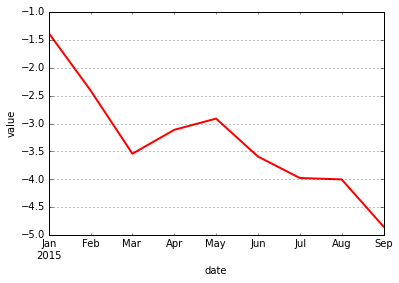

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df['No1'].cumsum().plot(style='r',lw=2)
plt.xlabel('date')
plt.ylabel('value')

## 分组操作

    pandas具有很强的数据分组操作能力，基于之前的例子，我们新增一列，通过月度进行分组：

In [9]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-1.376738,1.275606,1.151987,0.794059,Q1
2015-02-28,-1.028658,-1.948032,-0.020286,-0.308158,Q1
2015-03-31,-1.134787,0.644586,-1.446376,0.347286,Q1
2015-04-30,0.428776,0.382454,-1.302983,0.554891,Q2
2015-05-31,0.200771,-0.049584,1.114784,-0.961057,Q2
2015-06-30,-0.679689,1.392130,-0.518316,-0.501279,Q2
2015-07-31,-0.384334,0.147521,-2.318875,-1.745496,Q3
2015-08-31,-0.025519,0.183930,0.512218,0.379611,Q3
2015-09-30,-0.845315,0.858769,0.123257,-0.816389,Q3


   上面的DataFrame增加了Quarter列，其中的值为字符串'Q1'...'Q3'.

In [10]:
groups = df.groupby('Quarter')

    按照'Quarter'列进行分组。

In [11]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-1.180061,-0.00928,-0.104892,0.277729
Q2,-0.016714,0.57500,-0.235505,-0.302482
Q3,-0.418389,0.39674,-0.561133,-0.727425


    基于'Quarter'进行分组后，对于其他列的值求出平均值。

In [12]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,-1.028658,1.275606,1.151987,0.794059
Q2,0.428776,1.392130,1.114784,0.554891
Q3,-0.025519,0.858769,0.512218,0.379611


   基于'Quarter'进行分组后，对于其他列的值求出最大值。

## 多列分组

    可以基于多列进行分组。基于上面的数据，再增加一列：

In [13]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
'Odd', 'Even', 'Odd']

    增加一列'Odd_Even'，根据'Quarter'和'Odd_Even'进行分组。

In [14]:
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [15]:
 groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -1.028658 -1.948032 -0.020286 -0.308158
        Odd      -1.255763  0.960096 -0.147195  0.570672
Q2      Even     -0.125457  0.887292 -0.910649  0.026806
        Odd       0.200771 -0.049584  1.114784 -0.961057
Q3      Even     -0.025519  0.183930  0.512218  0.379611
        Odd      -0.614824  0.503145 -1.097809 -1.280942

[6 rows x 4 columns]

    基于两列对于数据进行分组。

## 金融数据

    通过pandas内建的DataReader函数从Yahoo主页抓取金融数据并进行分析展示。

In [16]:
import pandas.io.data as web
SP = web.DataReader(name='^GSPC', data_source='yahoo',start='2015-1-1',end='2016-1-1')
SP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 00:00:00 to 2015-12-31 00:00:00
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)

    从yahoo网站获取了标普指数从2005年到2016年的数据，一共2769条记录。

   展示最后的五条记录。

In [17]:
SP.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,1411860000,2060.989990
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2492510000,2056.500000
2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2542000000,2078.360107
2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2367430000,2063.360107
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2655330000,2043.939941


   根据收盘点位绘图：

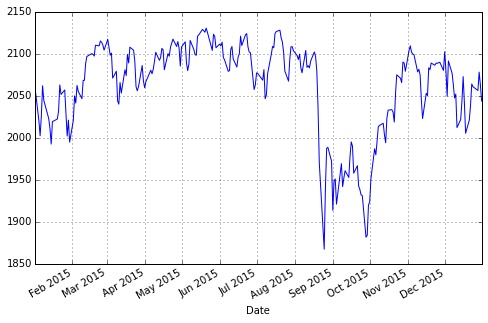

In [18]:
SP['Close'].plot(figsize=(8, 5))

        在上述的DataFrame中，对于收盘价格，计算对数收益率：

In [19]:
%%time
SP['Ret_Loop'] = 0.0
for i in range(1, len(SP)):
    SP['Ret_Loop'][i] = np.log(SP['Close'][i] / SP['Close'][i - 1])

Wall time: 19 ms


In [20]:
SP[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2015-12-24,2060.989990,-0.001600
2015-12-28,2056.500000,-0.002181
2015-12-29,2078.360107,0.010574
2015-12-30,2063.360107,-0.007243
2015-12-31,2043.939941,-0.009456


   也可以通过shift方法，

In [21]:
%time SP['Return'] = np.log(SP['Close'] / SP['Close'].shift(1))

Wall time: 1e+03 µs


In [22]:
SP[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2015-12-24,2060.989990,-0.001600,-0.001600
2015-12-28,2056.500000,-0.002181,-0.002181
2015-12-29,2078.360107,0.010574,0.010574
2015-12-30,2063.360107,-0.007243,-0.007243
2015-12-31,2043.939941,-0.009456,-0.009456


    对于上述的收盘和日收益进行绘图：

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0B64D7B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0B67FFD0>], dtype=object)

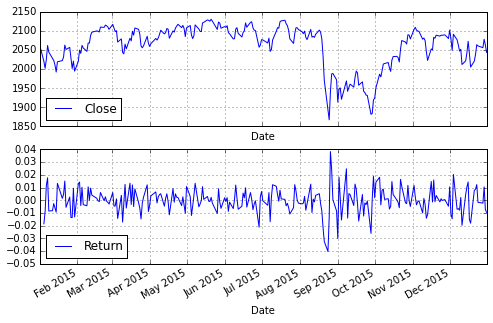

In [24]:
SP[['Close', 'Return']].plot(subplots=True, style='b',figsize=(8, 5))

    通常收益和波动负相关。

### 移动平均线

    在研究股票趋势的时候，通常会用到移动平均线（MA），可以通过rolling_mean方法基于收盘价格进行计算：

In [33]:
SP['42d'] = pd.rolling_mean(SP['Close'], window=42)
SP['5d'] =  pd.rolling_mean(SP['Close'], window=5)

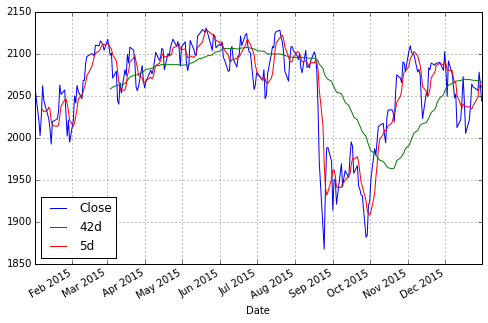

In [34]:
SP[['Close', '42d', '5d']].plot(figsize=(8,5))

    可以看到5日线和42日线以及日线走势。